<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/02_classification_using_NN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What are we going to cover in this nb:
* Architecture of a classification model
* Input shapes and output shapes
1. X: features/data (inputs)
2. y: labels (outputs)
    *  "What class do the inputs belong to?"
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
            * Finding the best learning rate
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
    * Improving a model
* The power of non-linearity
* Evaluating classification models
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)

**NOTE:**
**Output Activation: sigmoid used for Binary Classification, while Softmax is used for Multiclass Classification,**

**Loss function: Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow) for Binary Classification, Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow) for Multiclass Classification**

**Output shape: 1 output for Binary classification,
Tensor of output classes where O(i) = prob. of output being class i for multiclass classification**

### Architecture of a classification model

Input Layer
hidden layer
Output Layer

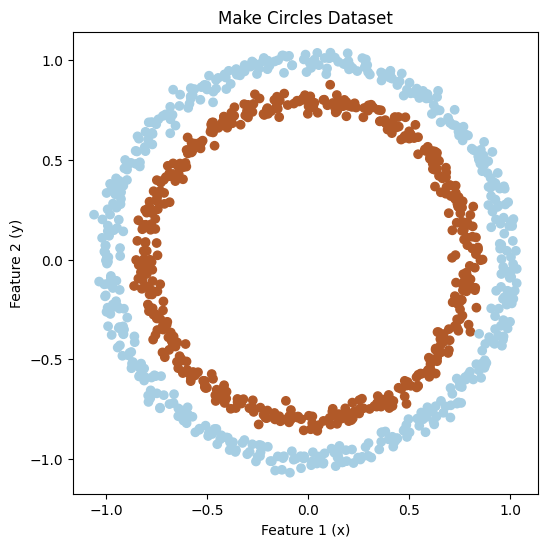

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000

# X, y = make_circles(n_samples,
#                     noise=0.05, factor=0.6, # radius of inner circle = factor * radius of outer circle
#                     random_state=42)

# radius of inner circle = factor * radius of outer circle
X, y = make_circles(n_samples, noise=0.03, random_state = 42)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Make Circles Dataset")
plt.xlabel("Feature 1 (x)")

plt.ylabel("Feature 2 (y)")
plt.show()

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

###Making dataset in pandas

In [ ]:
import pandas as pd
df = pd.DataFrame({"X0": X[:,0],"X1": X[:,1],"y": y})

In [ ]:
df

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
df.y.value_counts()

,count
y,
1,500
0,500


In [ ]:
X.shape,y.shape #y is scalar for each data sample

((1000, 2), (1000,))

In [ ]:
X.size #returns totalnumber of values contained in it

2000

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Creating the model, fitting it and evaluating it

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy']) # accuracy = how many labels were correctly predicted

model_1.fit(X_train, y_train,  epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5067 - loss: 0.7264
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5021 - loss: 0.7187
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4997 - loss: 0.7124 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5034 - loss: 0.7073
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4997 - loss: 0.7030
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5055 - loss: 0.6995
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5125 - loss: 0.6967
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5182 - loss: 0.6943
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5188 - loss: 0.6924
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5231 - loss: 0.6909
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5234 - loss: 0.6898
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5226 - l


### Improving the model: new model with an additional dense layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5160 - loss: 0.7020   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4970 - loss: 0.7011 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4871 - loss: 0.7003 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4875 - loss: 0.6997 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4968 - loss: 0.6991 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4926 - loss: 0.6986  
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4847 - loss: 0.6982 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4924 - loss: 0.6978 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4905 - loss: 0.6974 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4908 - loss: 0.6971 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 0.6968 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [ ]:
model_2.evaluate(X, y) #returns loss and metrics

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6163 - loss: 0.6805  


[0.6848773956298828, 0.5989999771118164]

### Changing the activation function

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.Input(shape = (2,)), #input layer
  tf.keras.layers.Dense(16, activation = 'tanh'), #hidden layers
  tf.keras.layers.Dense(4, activation = 'tanh'),
  tf.keras.layers.Dense(1, activation = 'sigmoid') # activation fn in output : sigmoid for binary classification
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5140 - loss: 0.6952   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 0.6942 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4867 - loss: 0.6936 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4989 - loss: 0.6933 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 0.6930 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5016 - loss: 0.6928 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5428 - loss: 0.6927  
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5694 - loss: 0.6925 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5604 - loss: 0.6924 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 0.6924 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5579 - loss: 0.6923  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

In [ ]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5782 - loss: 0.6870  


[0.6883584260940552, 0.5490000247955322]

**doesn't work well**

### visualizing the model: seeing its decision boundary so as to see if it is going wrong

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.6)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


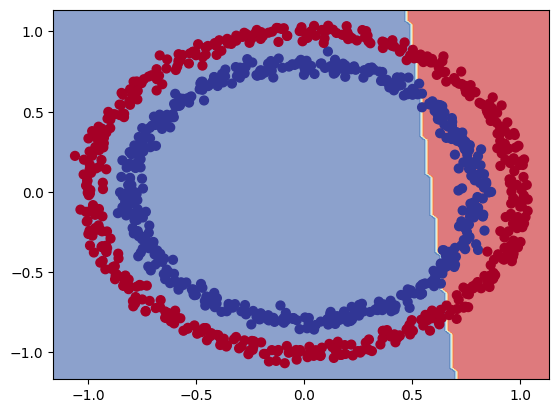

In [ ]:
plot_decision_boundary(model_1, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


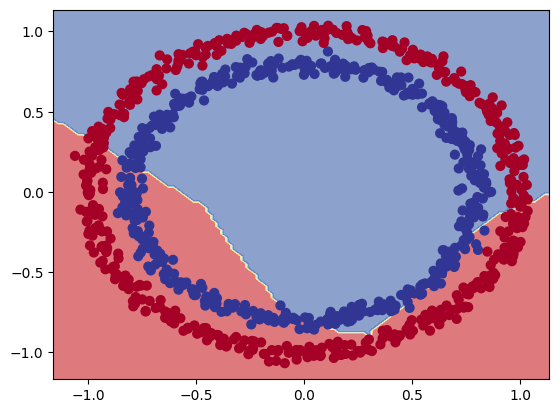

In [ ]:
plot_decision_boundary(model_2, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


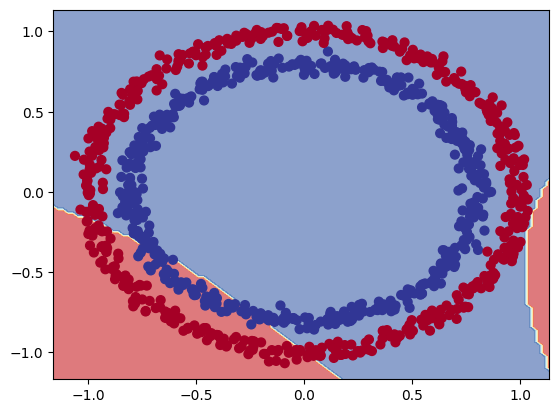

In [ ]:
plot_decision_boundary(model_3, X, y)

**Note: last model(model_3) is overcomplicating th decision boundary**

#### TRYING OUT A SIMPLER MODEL as model_3 is overcomplicating the decision boundary

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Input(shape = (2,)),
  tf.keras.layers.Dense(3, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
                metrics=["accuracy"])

history = model_4.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 1.6272  
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5338 - loss: 0.6990
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5726 - loss: 0.6875
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5717 - loss: 0.6829 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 0.6803 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 0.6784 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5847 - loss: 0.6769 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5811 - loss: 0.6755 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5865 - loss: 0.6741 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 0.6728 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5979 - loss: 0.6715
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


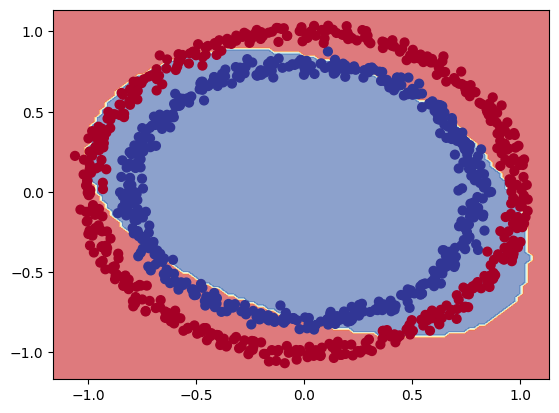

In [ ]:
plot_decision_boundary(model_4, X, y)

In [ ]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7367 - loss: 0.5758  


[0.5827968716621399, 0.7149999737739563]

Text(0.5, 1.0, 'model 4 training curves')

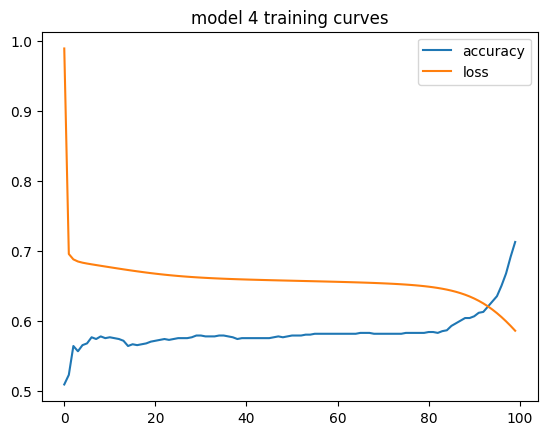

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model 4 training curves")

**Note: changing the activation functions in output layer is important, like in classification its better to have sigmoid/tanh/softmax activation functions**

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12 (52.00 B)

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_1.predict(X_test)[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.5304118 ],
       [0.5304118 ],
       [0.5304118 ],
       [0.5304118 ],
       [0.5304118 ],
       [0.50271094],
       [0.40710598],
       [0.37570646],
       [0.5304118 ],
       [0.5304118 ]], dtype=float32)

In [ ]:
model_2.predict(X_test)[:10].squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([0.5266479 , 0.52360564, 0.44943154, 0.5283631 , 0.5014619 ,
       0.500129  , 0.5179011 , 0.5154918 , 0.44461086, 0.52323794],
      dtype=float32)

In [ ]:
model_3.predict(X_test)[:10].squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([0.52166   , 0.51607305, 0.50189084, 0.5150006 , 0.512873  ,
       0.51201946, 0.51691675, 0.5067183 , 0.5013332 , 0.51599646],
      dtype=float32)

In [ ]:
model_4.predict(X_test)[:10].squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0.6352807 , 0.41903841, 0.52911806, 0.44303524, 0.5778371 ,
       0.61476755, 0.32942086, 0.4043753 , 0.51393807, 0.4017458 ],
      dtype=float32)

**🔑Note: Linearity and non-linearity(using activation fns) is a key feature of NN**

### finding the ideal learning rate

where the loss decreases most during training
> Steps:
* A learning rate **callback** - is a mechanism in deep learning that dynamically adjusts the learning rate during training.
* Another model
* modified loss curve plot


**lr callback**

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = 'Adam',
                metrics = ['accuracy'])

# creating a lr callback - works during model training

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/100))


history = model_5.fit(X_train, y_train,
                      epochs = 100,
                      callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5005 - loss: 0.6886 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5310 - loss: 0.6877 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5467 - loss: 0.6870 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5446 - loss: 0.6863 - learning_rate: 0.0011
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 0.6858 - learning_rate: 0.0011
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5523 - loss: 0.6852 - learning_rate: 0.0011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5713 - loss: 0.6846 - learning_rate: 0.0011
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5884 - loss: 0.6839 - learning_rate: 0.0012
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 0.6832 - learning_rate: 0.0012
Epoch 10/100
25/25 

In [ ]:
model_5.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0256  


[0.022335898131132126, 0.9950000047683716]

<Axes: >

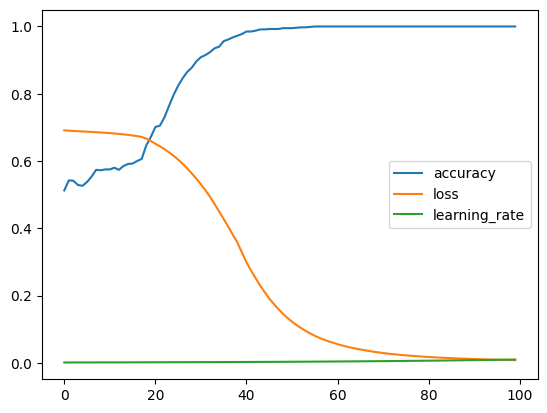

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
lr = 1e-4*10**(tf.range(100, dtype = tf.float32)/100)

In [ ]:
lr

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([9.99999975e-05, 1.02329301e-04, 1.04712853e-04, 1.07151922e-04,
       1.09647823e-04, 1.12201844e-04, 1.14815361e-04, 1.17489755e-04,
       1.20226439e-04, 1.23026868e-04, 1.25892548e-04, 1.28824948e-04,
       1.31825669e-04, 1.34896283e-04, 1.38038435e-04, 1.41253753e-04,
       1.44543970e-04, 1.47910832e-04, 1.51356115e-04, 1.54881651e-04,
       1.58489318e-04, 1.62181008e-04, 1.65958685e-04, 1.69824358e-04,
       1.73780078e-04, 1.77827940e-04, 1.81970085e-04, 1.86208708e-04,
       1.90546067e-04, 1.94984459e-04, 1.99526228e-04, 2.04173804e-04,
       2.08929603e-04, 2.13796200e-04, 2.18776142e-04, 2.23872106e-04,
       2.29086771e-04, 2.34422871e-04, 2.39883273e-04, 2.45470874e-04,
       2.51188641e-04, 2.57039559e-04, 2.63026770e-04, 2.69153476e-04,
       2.75422848e-04, 2.81838264e-04, 2.88403156e-04, 2.95120932e-04,
       3.01995140e-04, 3.09029536e-04, 3.16227757e-04, 3.23593646e-04,
       3.31131101e-04, 3.3884

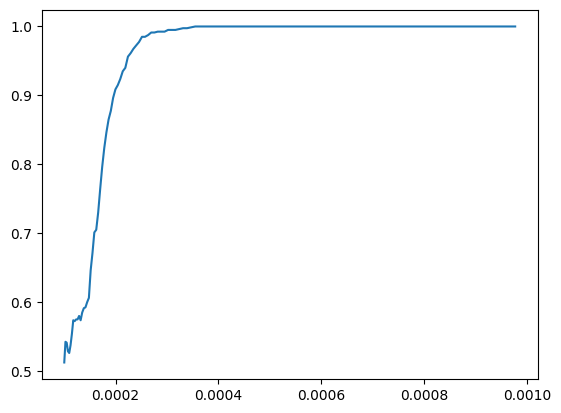

In [ ]:
plt.plot(lr, history.history['accuracy'])
plt.show()

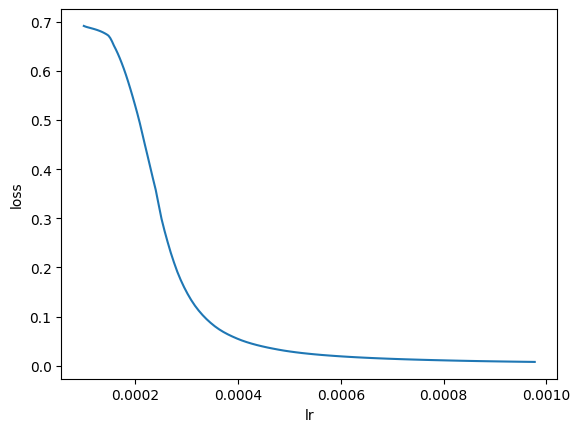

In [ ]:
plt.plot(lr, history.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')
plt.show()

#### lr where loss decreases the most is 0.0003 -> ideal learning rate

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


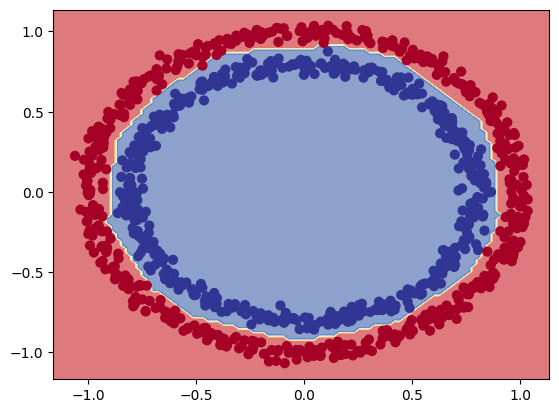

In [ ]:
plot_decision_boundary(model_5, X, y)

In [ ]:
y_pred = model_5.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
y_pred[:10].squeeze()

array([9.9962872e-01, 1.5774414e-02, 9.9857897e-01, 1.9603611e-03,
       9.9224240e-01, 9.2998785e-01, 9.9100580e-04, 4.8980979e-05,
       9.9645257e-01, 7.5227944e-03], dtype=float32)

In [ ]:
tf.round(y_pred)[:10] #.squeeze()

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

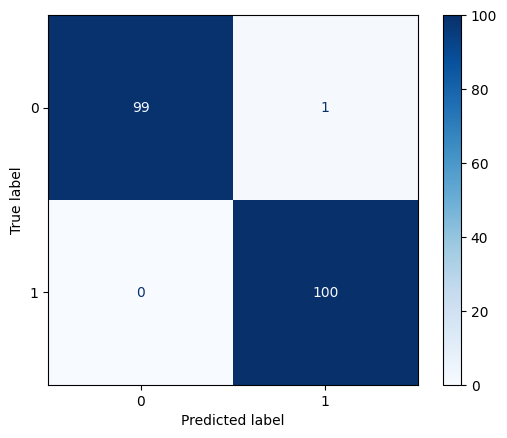

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = y_pred.squeeze()
y_pred = tf.round(y_pred)
cm = confusion_matrix(y_test.squeeze(), y_pred)

# plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Multi-class Classification
Dataset: https://github.com/zalandoresearch/fashion-mnist

> each image is in grayscale

> 28 x 28 = dim of each image

> plt.imshow() shows image with colormap 'virdis'

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

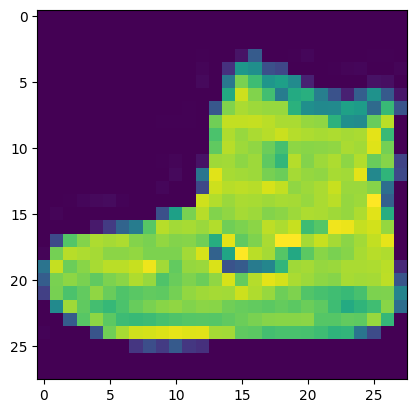

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
img = np.array(train_data[0])
img[0][0]

0

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

**Labels<br>
Each training and test example is assigned to one of the following labels:**

**Label	Description <br>
0	T-shirt/top <br>
1	Trouser <br>
2	Pullover <br>
3	Dress <br>
4	Coat <br>
5	Sandal <br>
6	Shirt <br>
7	Sneaker <br>
8	Bag <br>
9	Ankle boot**

In [ ]:
# plotting the category to its name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

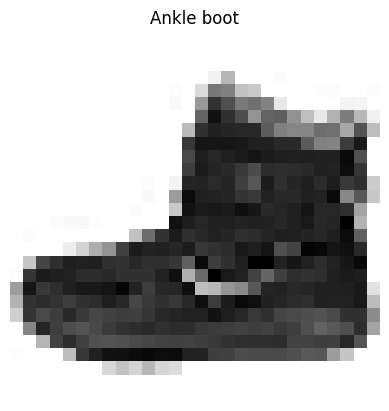

In [ ]:
# viewing image in grayscale

plt.imshow(train_data[0], cmap = plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.axis(False)

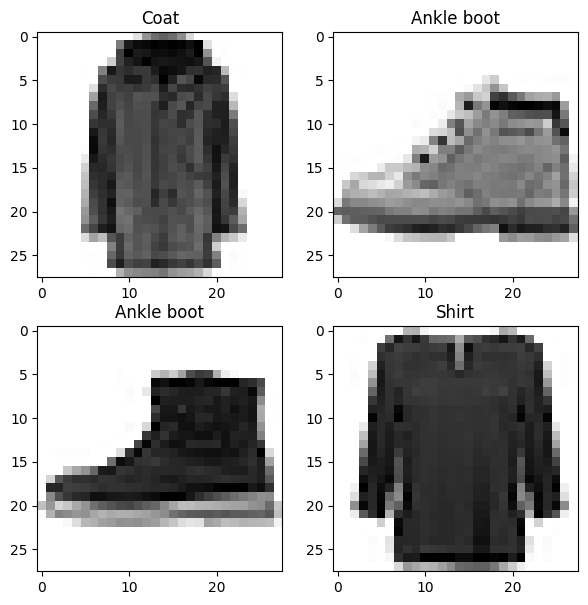

In [ ]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    # plt.axis(False)


#### **for traditional NNs, dense layers expect 1D input vectors, each neuron is treated as individual input**
**Input: 28 x 28 -> (784, )<br>
Hidden Layers: ----<br>
Output Layer: 10 for 10 labels(where output(ith neuron) = prob of input image belonging to class 'i')<br>**


**Output activation: softmax<br>
loss: binary cross entropy<br>
optimizer: Adam/SGD**



#### Loss: categorical binary entropy, sparse categorical cross entropy

In [ ]:
# MAKING THE MODEL
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

model_1_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer( reshape 28 x 28 )
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# as predicted vector is of size 10 for an input samples thus same should hold for real output vector
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

train_labels_one_hot, test_labels_one_hot

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

#### > Trying  binary cross entropy loss function: requires labels to be one hot encoded

In [ ]:

model_1_1.compile(loss = 'categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])

# show loss over both train and test data
history_1_1 = model_1_1.fit(train_data, train_labels_one_hot, epochs = 40, validation_data = (test_data, test_labels_one_hot))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1405 - loss: 5.1664 - val_accuracy: 0.1937 - val_loss: 1.9296
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2405 - loss: 1.8228 - val_accuracy: 0.4367 - val_loss: 1.3897
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4697 - loss: 1.3425 - val_accuracy: 0.5007 - val_loss: 1.1779
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5649 - loss: 1.0882 - val_accuracy: 0.6219 - val_loss: 0.9604
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6335 - loss: 0.9328 - val_accuracy: 0.6457 - val_loss: 0.8730
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6578 - loss: 0.8602 - val_accuracy: 0.6523 - val_loss: 0.8447
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6696 - loss: 0.8285 - val_accuracy: 0.6716 - val_loss: 0.8042
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6838 - loss: 0.7985 - 

#### > Trying sparse categorical cross entropy: requires labels to be integers

In [ ]:
# MAKING THE MODEL
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

model_1_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer( reshape 28 x 28 )
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# train_labels_one_hot, test_labels_one_hot
# lr_scheduler =
model_1_2.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics = ['accuracy'])

# show loss over both train and test data
history_1_2 = model_1_2.fit(train_data, train_labels, epochs = 20, validation_data = (test_data, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1160 - loss: 3.4201 - val_accuracy: 0.1744 - val_loss: 2.1297
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1773 - loss: 2.1107 - val_accuracy: 0.1906 - val_loss: 2.0968
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2160 - loss: 2.0066 - val_accuracy: 0.3411 - val_loss: 1.6897
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3476 - loss: 1.6396 - val_accuracy: 0.3645 - val_loss: 1.5414
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3600 - loss: 1.5202 - val_accuracy: 0.3701 - val_loss: 1.4941
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3698 - loss: 1.4747 - val_accuracy: 0.3754 - val_loss: 1.4848
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3935 - loss: 1.4267 - val_accuracy: 0.4683 - val_loss: 1.2653
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4695 - loss: 1.2449 - 

In [ ]:
model_1_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,360 (149.85 KB)

 Trainable params: 12,786 (49.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,574 (99.90 KB)

In [ ]:
model_1_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,348 (149.80 KB)

 Trainable params: 12,782 (49.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,566 (99.87 KB)

In [ ]:
train_data[0] #train_data[1], train_data[2], train_data[3], train_data[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
train_data[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
train_data[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  77,  88,  77,  80,
         83,  83,  83,  83,  81,  95,  76,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  89,  96,  80,  83,
         81,  84,  85,  85,  85,  97,  84,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  93,  97,  81,  85,
         84,  85,  87,  88,  84,  99,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  95,  87,  84,  87,
         88,  85,  87,  87,  84,  92,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  87,  87,  85,
         88,  87,  87,  87,  88,  85, 107,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  17, 100,  88,  87,  87,
         88,  87,  87,  85,  89,  77, 118,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,  93,  87,  87,  87,
         87,  87,  88,  87,  89,  80, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,  96,  87,  87,  87,
         87,  87,  88,  87,  88,  87, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12,  96,  85,  87,  87,
         87,  85,  87,  87,  88,  89, 100,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  20,  95,  84,  88,  85,
         87,  88,  88,  88,  89,  88,  99,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21,  96,  85,  87,  85,
         88,  88,  88,  88,  89,  89,  99,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24,  96,  85,  87,  85,
         87,  88,  88,  89,  88,  91, 102,  14,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25,  93,  84,  88,  87,
         87,  87,  87,  87,  89,  91, 103,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  95,  85,  88,  88,
         87,  87,  87,  87,  89,  88, 102,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,  96,  88,  87,  87,
         87,  87,  87,  87,  85,  85,  97,  38,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  40,  96,  87,  85,  87,
         87,  87,  87,  87,  85,  84,  92,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  46,  95,  83,  84,  87,
         87,  87,  87,  87,  87,  84,  87,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72,  95,  85,  84,  85,
         88,  87,  87,  89,  87,  85,  83,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_data[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 221, 158, 137, 135, 123, 110,
        110, 114, 108, 112, 117, 127, 142,  77,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  25, 158, 137, 125, 119, 119,
        110, 117, 117, 110, 119, 127, 144,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 123, 156, 129, 112, 110,
        102, 112, 100, 121, 117, 129, 114,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 125, 169, 127, 119, 106,
        108, 104,  94, 121, 114, 129,  91,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  98, 171, 129, 112, 104,
        114, 106, 102, 112, 104, 133,  64,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  66, 173, 135, 129,  98,
        100, 119, 102, 108,  98, 135,  60,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  56, 171, 135, 127, 100,
        108, 117,  85, 106, 110, 135,  66,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  52, 150, 129, 110, 100,
         91, 102,  94,  83, 104, 123,  66,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  66, 167, 140, 148, 148,
        127, 137, 152, 146, 146, 148,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 123,  94, 104,  96,
        119, 121, 106,  98, 112,  87, 114,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 106,  89,  58,  50,  37,
         50,  66,  56,  50,  75,  75, 137,  22,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  29, 148, 114, 106, 125,  89,
        100, 133, 117, 131, 131, 131, 125, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100, 106, 114,  91, 137,  62,
        102, 131,  89, 135, 112, 131, 108, 135,  37,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 146, 100, 108,  98, 144,  62,
        106, 131,  87, 133, 104, 160, 117, 121,  68,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  33, 121, 108,  96, 100, 140,  71,
        106, 127,  85, 140, 104, 150, 140, 114,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  62, 119, 112, 102, 110, 137,  75,
        106, 144,  81, 144, 108, 117, 154, 117, 104,  18,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 121, 102, 112, 117, 131,  73,
        104, 156,  77, 137, 135,  83, 179, 129, 121,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 127,  81, 125, 133, 119,  79,
        100, 169,  83, 129, 175,  60, 163, 135, 146,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 10

In [ ]:
train_data[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70, 228, 213, 220, 224,
        252, 239, 219, 217, 231, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 214, 218, 216,
        210, 215, 217, 202, 224, 172,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24, 254, 214, 210, 211,
        214, 215, 212, 203, 221, 167,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 216, 215, 217,
        217, 216, 216, 206, 225, 150,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        216, 214, 212, 203, 226, 136,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 245, 216, 214, 216,
        217, 215, 211, 204, 225, 125,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        220, 217, 213, 203, 222, 147,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 216, 215, 218,
        222, 216, 214, 207, 218, 179,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 216, 217, 219,
        222, 217, 214, 210, 215, 211,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 255, 214, 218, 219,
        224, 218, 215, 211, 211, 231,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  79, 227, 209, 219, 219,
        227, 219, 215, 213, 206, 254,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 226, 211, 220, 219,
        228, 218, 215, 216, 205, 219, 163,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 221, 214, 221, 219,
        231, 218, 215, 218, 213, 212, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 234, 217, 216, 220, 219,
        234, 217, 215, 218, 216, 223, 247,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  17, 254, 212, 219, 219, 220,
        233, 214, 216, 219, 222, 153, 238,  58,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  66, 255, 208, 220, 219, 222,
        241, 220, 218, 218, 218, 192, 242,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 142, 235, 203, 218, 216, 231,
        242, 225, 233, 219, 214, 216, 238, 144,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177, 248, 227, 229, 211, 255,
         76,   0, 247, 243, 230, 230, 249, 187,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
model_1_2.predict(train_data) #need to round off

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[1.1662097e-18, 1.7752366e-23, 9.1235830e-30, ..., 1.3573946e-02,
        6.5828325e-16, 9.8627955e-01],
       [1.6152321e-01, 1.6675974e-01, 1.6631792e-01, ..., 3.0750516e-04,
        5.2196411e-03, 5.3110218e-04],
       [1.6152321e-01, 1.6675974e-01, 1.6631792e-01, ..., 3.0750516e-04,
        5.2196411e-03, 5.3110218e-04],
       ...,
       [1.6152321e-01, 1.6675974e-01, 1.6631792e-01, ..., 3.0750516e-04,
        5.2196411e-03, 5.3110218e-04],
       [1.6152321e-01, 1.6675974e-01, 1.6631792e-01, ..., 3.0750516e-04,
        5.2196411e-03, 5.3110218e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5288970e-05,
        3.1540622e-26, 0.0000000e+00]], dtype=float32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


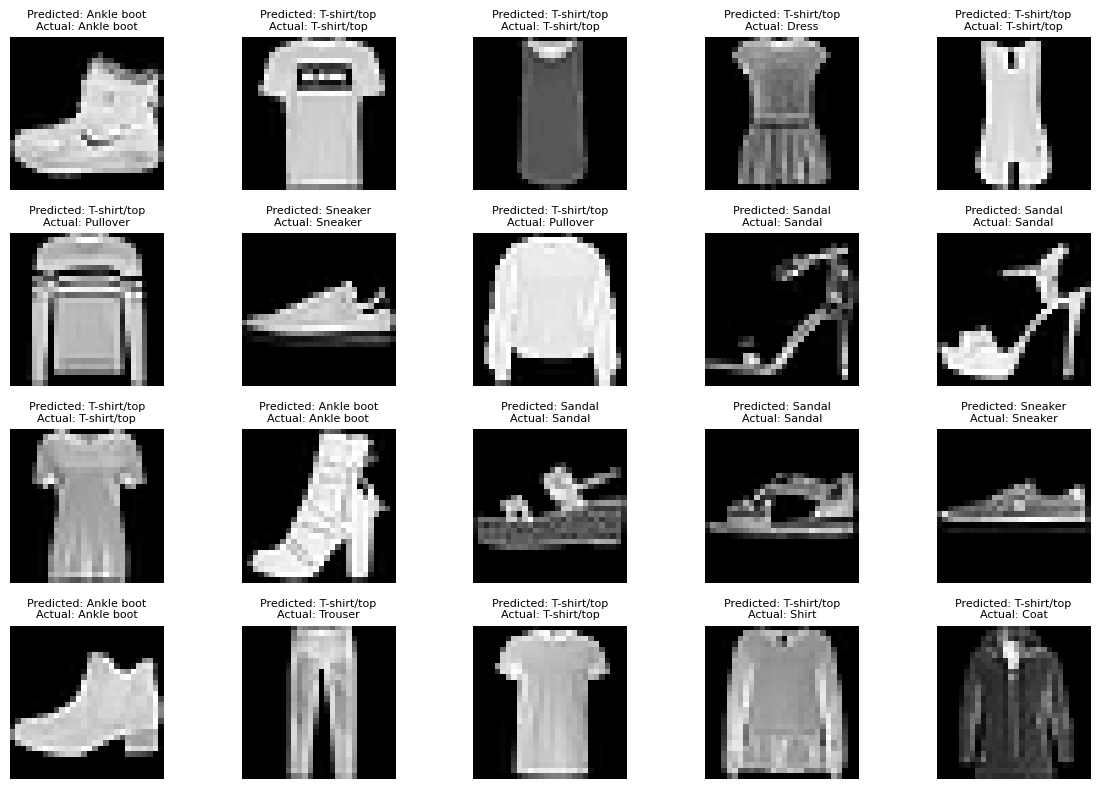

In [ ]:
predictions_one_hot = model_1_2.predict(train_data[0:50])
predictions_one_hot = np.round(predictions_one_hot)
predicted_classes_index = np.argmax(predictions_one_hot, axis = 1)
fig, axes = plt.subplots(4, 5, figsize=(12, 8)) # 4 rows, 5 columns,

for i, ax in enumerate(axes.flat[:20]): # in range(20):
  pred_class = class_names[predicted_classes_index[i]]
  actual_class = class_names[train_labels[i]]
  ax.imshow(train_data[i], cmap="grey")
  ax.axis("off")
  ax.set_title(f"Predicted: {pred_class}\nActual: {actual_class}", fontsize=8)
plt.tight_layout()
plt.show()


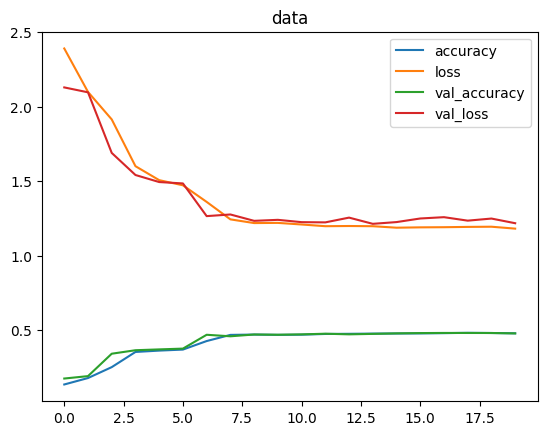

In [ ]:
pd.DataFrame(history_1_2.history).plot(title="data");

#### Normalizing the data

In [ ]:
train_data = train_data / 255.0 #pixel value range: 0-255
test_data = test_data / 255.0

train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# training model on normalized data
tf.random.set_seed(42)

model_1_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1_3.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics = ['accuracy'])

history_1_3 = model_1_3.fit(train_data, train_labels, epochs = 20, validation_data=(test_data, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6372 - loss: 1.0310 - val_accuracy: 0.8198 - val_loss: 0.5237
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8320 - loss: 0.4870 - val_accuracy: 0.8358 - val_loss: 0.4761
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8484 - loss: 0.4384 - val_accuracy: 0.8401 - val_loss: 0.4551
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8567 - loss: 0.4102 - val_accuracy: 0.8438 - val_loss: 0.4438
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.3918 - val_accuracy: 0.8450 - val_loss: 0.4397
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8661 - loss: 0.3782 - val_accuracy: 0.8449 - val_loss: 0.4346
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8698 - loss: 0.3685 - val_accuracy: 0.8480 - val_loss: 0.4289
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.3602 - 

<Axes: >

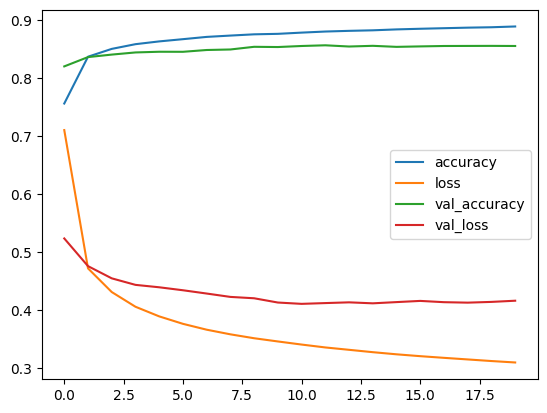

In [ ]:
pd.DataFrame(history_1_3.history).plot()

#### Comparing plots of normalized vs unnormalized data

<Axes: title={'center': 'normalized loss curve'}>

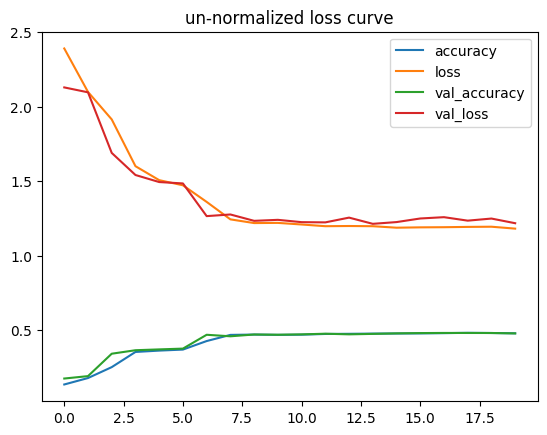

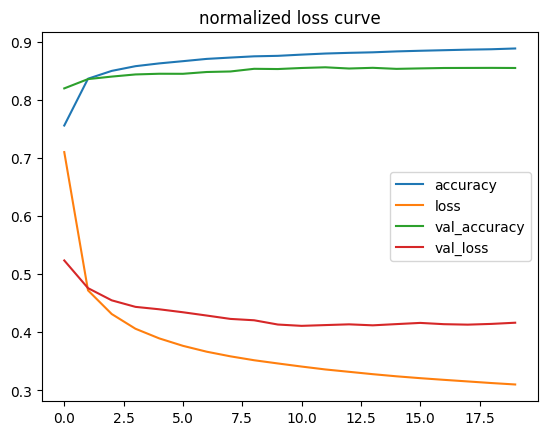

In [ ]:
pd.DataFrame(history_1_2.history).plot(title="un-normalized loss curve")
pd.DataFrame(history_1_3.history).plot(title="normalized loss curve")


In [ ]:
train_preds = model_1_3.predict(train_data)
test_preds = model_1_3.predict(test_data)

train_preds = np.argmax(train_preds, axis=1)
test_preds = np.argmax(test_preds, axis=1)

all_preds = np.concatenate((train_preds, test_preds), axis = 0)
all_preds[:10]

all_labels = np.concatenate((train_labels, test_labels), axis = 0)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


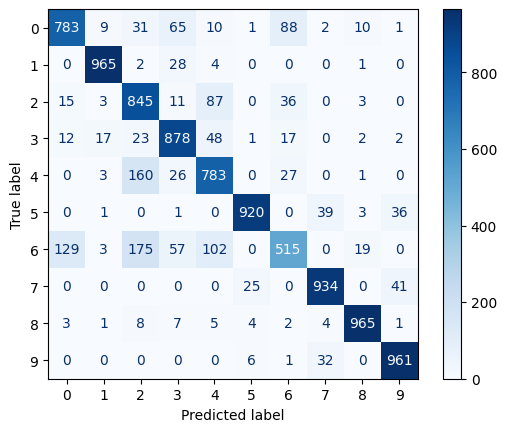

In [ ]:

# the whole concept of confusion matrix is to see how the model performs on unseen data/test data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, test_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
disp.plot(cmap=plt.cm.Blues)
plt.show()


### Patterns learnt by our model

In [ ]:
model_1_3.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_20, built=True>,
 <Dense name=dense_21, built=True>,
 <Dense name=dense_22, built=True>]

In [ ]:
model_1_3.layers[1]

<Dense name=dense_20, built=True>

#### checking out weights and biases

In [ ]:
weights_l1, biases_l1 = model_1_3.layers[1].get_weights()
weights_l1, weights_l1.shape

(array([[-0.37093422,  0.2134152 , -0.01892498, ..., -0.6138639 ,
          0.0754309 , -0.27990487],
        [-0.6079205 ,  0.7455509 , -0.4976942 , ..., -0.6698018 ,
          0.5218163 ,  0.03152968],
        [-0.7407454 ,  0.9124652 , -0.60140216, ..., -1.0215183 ,
         -0.87757325, -0.162831  ],
        ...,
        [-0.3476766 ,  0.21543945,  0.06610174, ...,  0.381405  ,
          0.02584342, -0.25089034],
        [-0.82075745, -0.38563415,  0.84566   , ...,  0.28302473,
          0.04056519,  0.0881495 ],
        [-0.579467  ,  0.5761073 ,  0.8001814 , ..., -0.6591959 ,
          0.7215879 ,  0.06595268]], dtype=float32),
 (784, 16))

In [ ]:
biases_l1, biases_l1.shape

(array([ 0.37343276,  0.3692878 , -0.6646387 ,  0.9693988 , -0.01637271,
         0.8472746 ,  0.9960368 ,  0.6915903 ,  0.6970117 ,  0.726568  ,
         0.26378912, -0.25440928,  0.18865496, -0.4831935 ,  0.76409245,
        -0.14162815], dtype=float32),
 (16,))

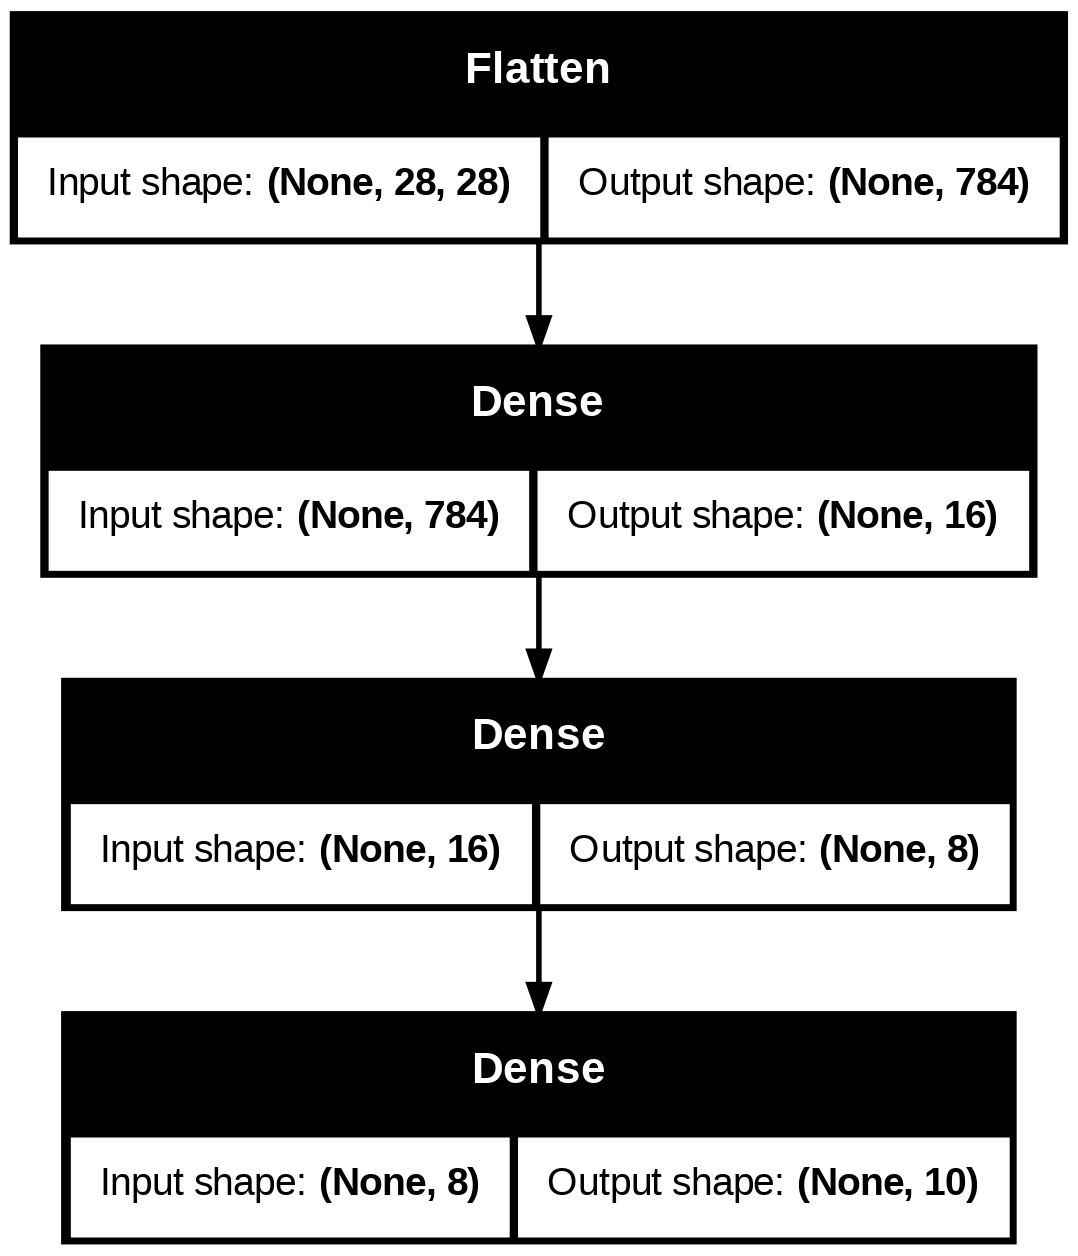

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1_3, show_shapes=True)

#### Excercise: making a classification model for make moons data

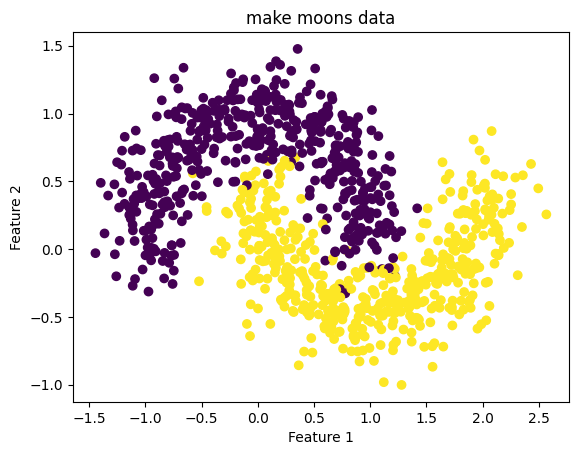

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise = 0.2, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'viridis') # c assigns colors based on class 'y', cmap -> assigns color
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make moons data')
plt.show()

#### Understanding the inputs and outputs




In [ ]:
X[0] # a point

array([-0.11166654,  0.52022374])

In [ ]:
y[0] # labels: 0/1

1

In [ ]:
X[0], y[0]

(array([-0.11166654,  0.52022374]), 1)

In [ ]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
X_train[:10]

array([[ 2.13965802,  0.37314783],
       [-1.20665488,  0.41689764],
       [-0.21171309,  1.17153886],
       [-0.0631975 ,  0.98421945],
       [ 0.39380555, -0.16203704],
       [-0.16600158,  0.84310531],
       [ 0.69571386, -0.28688713],
       [ 0.26253162, -0.13186241],
       [ 0.64169163,  0.86139366],
       [-0.92357616,  0.00244908]])

#### making the model

In [ ]:
tf.random.set_seed(42)

model_2_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2_1.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics = ['accuracy'])

model_2_1.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4954 - loss: 0.6968 - val_accuracy: 0.5550 - val_loss: 0.6793
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5399 - loss: 0.6796 - val_accuracy: 0.6450 - val_loss: 0.6661
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6303 - loss: 0.6666 - val_accuracy: 0.7100 - val_loss: 0.6543
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.6536 - val_accuracy: 0.8100 - val_loss: 0.6410
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8045 - loss: 0.6390 - val_accuracy: 0.8350 - val_loss: 0.6269
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8223 - loss: 0.6240 - val_accuracy: 0.8250 - val_loss: 0.6125
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.6090 - val_accuracy: 0.8300 - val_loss: 0.5979
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8370 - loss: 0.5937 - val_accuracy: 0.8400 - val_loss

In [ ]:
model_2_1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8745 - loss: 0.3602 


[0.3696013391017914, 0.8650000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classifcation...


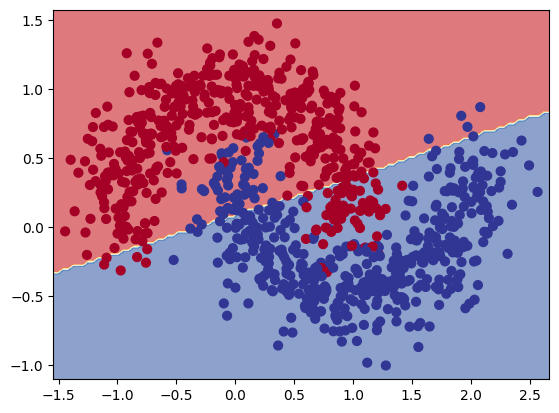

In [ ]:
plot_decision_boundary(model_2_1, X, y)

**Note: We dont need a linear decision boundary here, will have to add more neurons in hidden layer to get the non linear pattern**

In [ ]:
tf.random.set_seed(42)

model_2_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2_2.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics = ['accuracy'])

model_2_2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5074 - loss: 0.6502 - val_accuracy: 0.6200 - val_loss: 0.6094
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.5932 - val_accuracy: 0.7200 - val_loss: 0.5597
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.5462 - val_accuracy: 0.8100 - val_loss: 0.5165
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.5024 - val_accuracy: 0.8100 - val_loss: 0.4744
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 0.4629 - val_accuracy: 0.8150 - val_loss: 0.4379
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8375 - loss: 0.4294 - val_accuracy: 0.8250 - val_loss: 0.4070
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.4017 - val_accuracy: 0.8350 - val_loss: 0.3818
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8495 - loss: 0.3793 - val_accuracy: 0.8450 - val_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


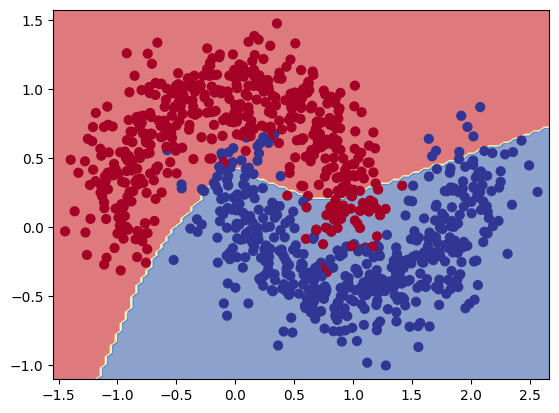

In [ ]:
plot_decision_boundary(model_2_2, X, y)

**better ig, lets train for more epochs and see if it gets better**

In [ ]:
model_2_2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9038 - loss: 0.2220 - val_accuracy: 0.9350 - val_loss: 0.1850
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9045 - loss: 0.2189 - val_accuracy: 0.9350 - val_loss: 0.1815
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.2158 - val_accuracy: 0.9350 - val_loss: 0.1781
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9126 - loss: 0.2127 - val_accuracy: 0.9400 - val_loss: 0.1746
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9183 - loss: 0.2095 - val_accuracy: 0.9400 - val_loss: 0.1712
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9211 - loss: 0.2064 - val_accuracy: 0.9400 - val_loss: 0.1677
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9214 - loss: 0.2033 - val_accuracy: 0.9500 - val_loss: 0.1643
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9221 - loss: 0.2002 - val_accuracy: 0.9500 - val_loss:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


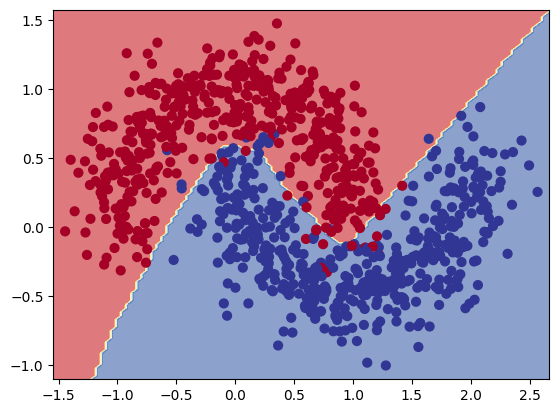

In [ ]:
plot_decision_boundary(model_2_2, X, y)

**this is working, lets change the activation in dense layer(to tanh/sigmoid) to get a smooth decision boundary**

In [ ]:
tf.random.set_seed(42)

model_2_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation = 'tanh'),
    tf.keras.layers.Dense(8, activation = 'tanh'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2_3.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics = ['accuracy']
)

model_2_3.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5479 - loss: 0.6980 - val_accuracy: 0.5950 - val_loss: 0.6279
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6635 - loss: 0.5950 - val_accuracy: 0.7000 - val_loss: 0.5499
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7455 - loss: 0.5218 - val_accuracy: 0.7600 - val_loss: 0.4913
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7840 - loss: 0.4680 - val_accuracy: 0.7900 - val_loss: 0.4454
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8054 - loss: 0.4272 - val_accuracy: 0.8100 - val_loss: 0.4089
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8287 - loss: 0.3961 - val_accuracy: 0.8150 - val_loss: 0.3802
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8405 - loss: 0.3727 - val_accuracy: 0.8250 - val_loss: 0.3579
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8443 - loss: 0.3553 - val_accuracy: 0.8400 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


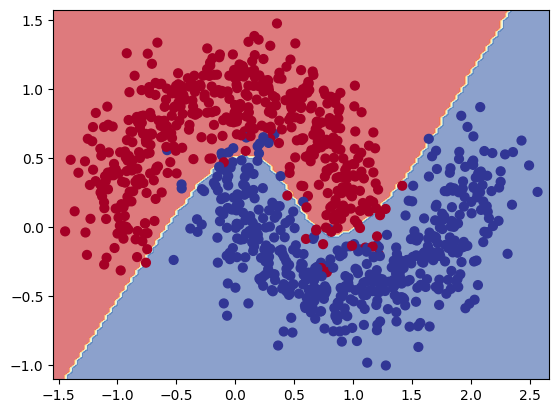

In [ ]:
plot_decision_boundary(model_2_3, X, y)

**looks kinda same, lets see after reducing the neurons in hidden layer**

In [ ]:
tf.random.set_seed(42)

model_2_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation = 'tanh'),
    tf.keras.layers.Dense(4, activation = 'tanh'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2_4.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003), # increased lr to 0.003 coz in 0.001 loss was getting stuck -> saddle point
                  metrics = ['accuracy'])
model_2_4.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4701 - loss: 0.6843 - val_accuracy: 0.6750 - val_loss: 0.5749
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7642 - loss: 0.5339 - val_accuracy: 0.7700 - val_loss: 0.4719
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7924 - loss: 0.4431 - val_accuracy: 0.8100 - val_loss: 0.4055
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8284 - loss: 0.3895 - val_accuracy: 0.8250 - val_loss: 0.3622
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.3570 - val_accuracy: 0.8500 - val_loss: 0.3350
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8608 - loss: 0.3376 - val_accuracy: 0.8600 - val_loss: 0.3185
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.3266 - val_accuracy: 0.8600 - val_loss: 0.3086
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8671 - loss: 0.3204 - val_accuracy: 0.8650 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classifcation...


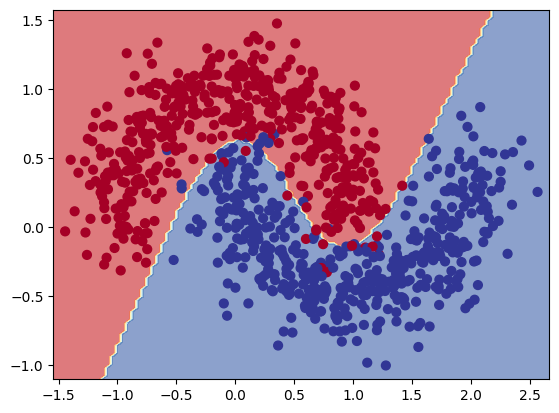

In [ ]:
plot_decision_boundary(model_2_4, X, y)

**works the same**

In [ ]:
model_2_4.predict(X_test)[:10].round().squeeze(), y_test[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

In [ ]:
model_2_4.layers

[<Dense name=dense_38, built=True>,
 <Dense name=dense_39, built=True>,
 <Dense name=dense_40, built=True>]

In [ ]:
# dimensions of weights in input layer
weights_l0, biases_l0 = model_2_4.layers[0].get_weights()
weights_l0.shape, biases_l0.shape

((2, 8), (8,))

In [ ]:
# dimensions of weights in hidden layer-1
weights_l1, biases_l1 = model_2_4.layers[1].get_weights()
weights_l1.shape, biases_l1.shape

((8, 4), (4,))

In [ ]:
# dimensions of weights in hidden layer-2
weights_l2, biases_l2 = model_2_4.layers[2].get_weights()
weights_l2.shape, biases_l2.shape

((4, 1), (1,))

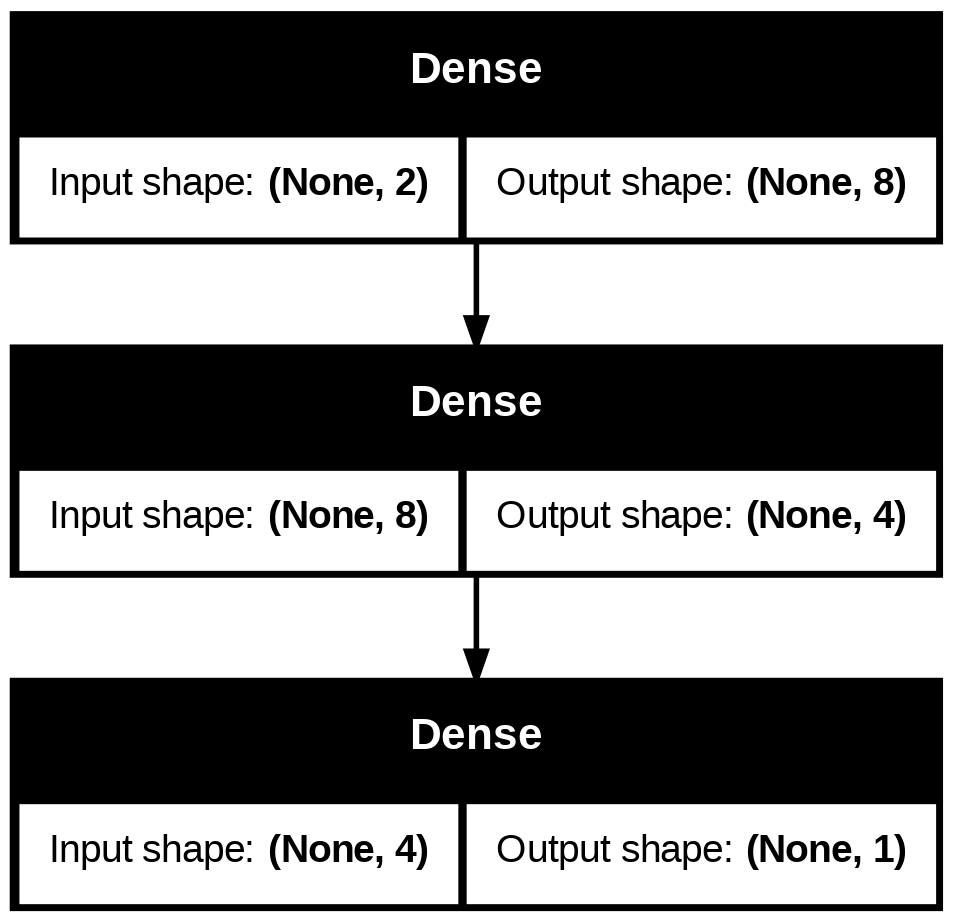

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_2_4, show_shapes = True)

In [ ]:
model_2_4.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)